<b> Roll Numbers and Names.: </b><br>&emsp; 
21BCE183 Parv Thacker <br>&emsp;
21BCE171 Ashu Pabreja <br>&emsp;
21BCE172 Krish Pachani <br>
<b> Course:  </b> 2CS404 Programming for Scientific Computing  <br>
<b> Innovative Assignment</b> Energy (as a product) Analysis and Prediction for Power Suppliers
<hr style="border:2px solid gray">

<h3><b> ReadMe </b></h3>
The project is designed to not require any inputs from user and display all the data with labelled plots so as to allow company to get accurate prediction to determine their power production need hourly so as to cause minimum wastage of resources.
<br><br>----------------------------------------------------------------------------------------<br>

One may or need to install, based on what is already installed:
<li>Either of <ol><li>Anaconda with Jupyter Notebook or <li>VSCode with Jupyter Notebook Extention and Python Installed</li></ol>
<li>numpy: » pip install numpy
<li>pandas: » pip install pandas
<li>seaborn: » pip install seaborn
<li>statistics: » pip install statistics
<li>scikit-learn: » pip install scikit-learn
<li>skforecast: » pip install skforecasat
<br><br>----------------------------------------------------------------------------------------<br>
The installation should be done from
<li> Anaconda Prompt for Anaconda based Jupyter Notebook or
<li> System Command Prompt/ Terminal for others.

In [2]:
# ----------------------------------------------------------
# Data
import numpy as np
import pandas as pd

# ----------------------------------------------------------
# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------------------------
# Stats and Prediction
import statistics as stats
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster

# ----------------------------------------------------------
# Others
import datetime as dt

c:\Program Files\Python311\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import warnings
warnings.filterwarnings('ignore')

# 1. Importing and Extracting Data

Note: The dataset is from Melbourne, Australia, and hence follows their holidays and temprature ranges.

In [4]:
df = pd.read_csv('21bce183.171.172.PSC.InnovativeAssignment.csv')
df = df.drop(columns=['Date','Time'])

In [5]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%dT%H:%M:%SZ')
data = df[['DateTime','Demand','Temperature','Holiday']]
df = df.set_index('DateTime')
df = df.asfreq('30min')
df = df.sort_index()

In [6]:
print ('-'*50,"Data",'-'*50)
print(df.head(5))

-------------------------------------------------- Data --------------------------------------------------
                          Demand  Temperature  Holiday
DateTime                                              
2020-01-01 00:00:00  4599.507418         29.1     True
2020-01-01 00:30:00  4772.133542         30.2     True
2020-01-01 01:00:00  4938.795740         31.3     True
2020-01-01 01:30:00  5080.138254         32.0     True
2020-01-01 02:00:00  5211.915476         32.7     True


In [7]:
print ('-'*50,"Info",'-'*50,)
print(df.info())

-------------------------------------------------- Info --------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52586 entries, 2020-01-01 00:00:00 to 2022-12-31 12:30:00
Freq: 30T
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Demand       52586 non-null  float64
 1   Temperature  52586 non-null  float64
 2   Holiday      52586 non-null  bool   
dtypes: bool(1), float64(2)
memory usage: 1.3 MB
None


# --------------------------------------------------------------------

# 2. Basic Data Analysis

In [8]:
df.describe()

,Demand,Temperature
count,52586.000000,52586.000000
mean,4665.815205,16.263070
std,874.223397,5.658952
min,2857.945728,1.500000
25%,3970.078653,12.300000
50%,4635.478384,15.400000
75%,5244.791284,19.400000
max,9345.004346,43.200000


Maximum

In [9]:
data[data['Demand'] == df['Demand'].max()]

,DateTime,Demand,Temperature,Holiday
35820,2022-01-16 06:00:00,9345.004346,38.8,False


Minimum

In [10]:
data[data['Demand'] == df['Demand'].min()]

,DateTime,Demand,Temperature,Holiday
38627,2022-03-15 17:30:00,2857.945728,13.8,False


In [11]:
df['Year'] = pd.DatetimeIndex(df.index).year
df['Month'] = pd.DatetimeIndex(df.index).month
df['Datex'] = pd.DatetimeIndex(df.index).day
df['Hour'] = pd.DatetimeIndex(df.index).hour

In [12]:
print(df.head(10))

                          Demand  Temperature  Holiday  Year  Month  Datex  \
DateTime                                                                     
2020-01-01 00:00:00  4599.507418        29.10     True  2020      1      1   
2020-01-01 00:30:00  4772.133542        30.20     True  2020      1      1   
2020-01-01 01:00:00  4938.795740        31.30     True  2020      1      1   
2020-01-01 01:30:00  5080.138254        32.00     True  2020      1      1   
2020-01-01 02:00:00  5211.915476        32.70     True  2020      1      1   
2020-01-01 02:30:00  5328.317180        32.65     True  2020      1      1   
2020-01-01 03:00:00  5436.420076        32.60     True  2020      1      1   
2020-01-01 03:30:00  5538.356502        32.00     True  2020      1      1   
2020-01-01 04:00:00  5641.188556        31.40     True  2020      1      1   
2020-01-01 04:30:00  5737.303578        30.60     True  2020      1      1   

                     Hour  
DateTime                   
2020-01

Unique Values in Year 2020

In [13]:
df[df.Year == 2022].nunique()

Demand         17497
Temperature      398
Holiday            2
Year               1
Month             12
Datex             31
Hour              24
dtype: int64

<h2> Energy Usage Plots

Text(0.5, 1.0, 'Demand Distribution')

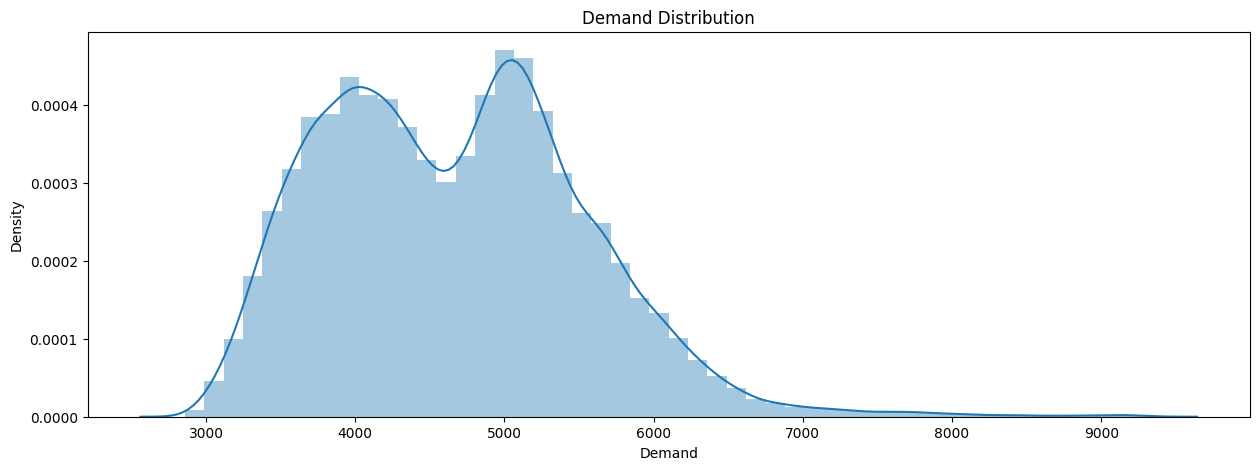

In [14]:
fig = plt.subplots(figsize=(15, 5))
sns.distplot(data["Demand"]).set_title("Demand Distribution")

Text(0.5, 1.0, 'Temperature Distribution')

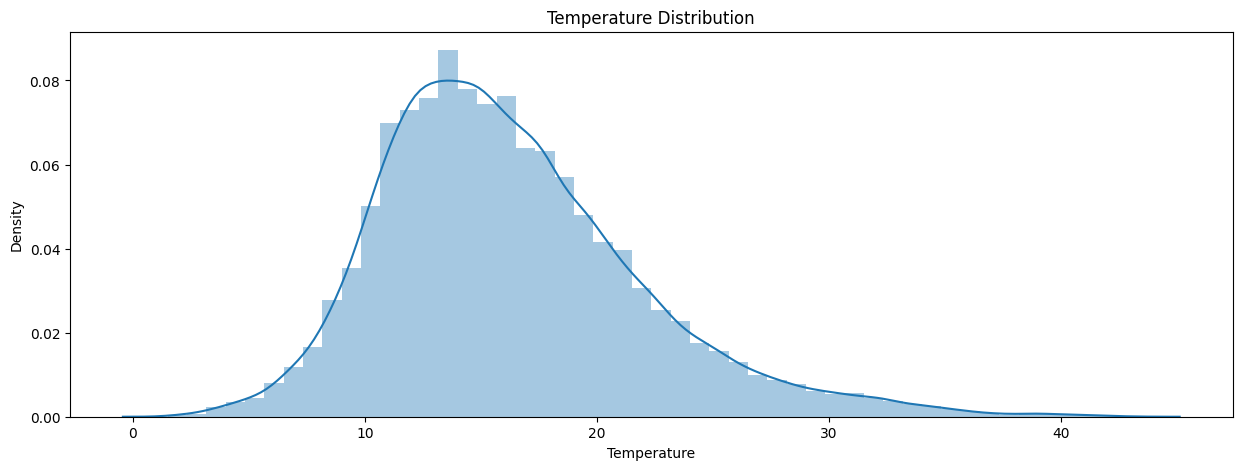

In [15]:
fig = plt.subplots(figsize=(15, 5))
sns.distplot(data["Temperature"]).set_title("Temperature Distribution")

([<matplotlib.axis.XTick at 0x23328eaa250>,
 [Text(2020.0, 0, '2020'), Text(2021.0, 0, '2021'), Text(2022.0, 0, '2022')])

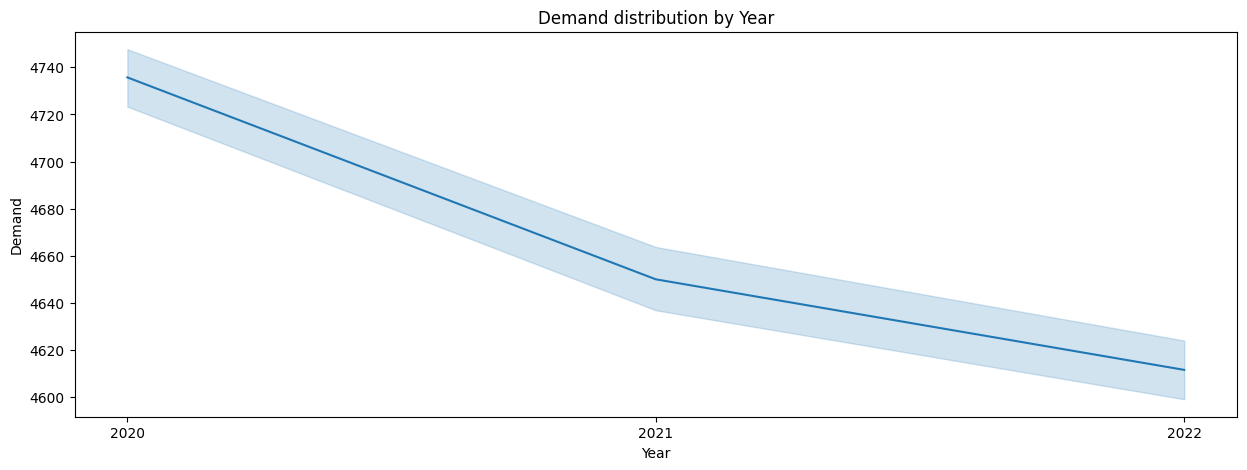

In [16]:
fig = plt.subplots(figsize=(15, 5))
sns.lineplot (x=df.Year, y=df.Demand, data=df).set_title('Demand distribution by Year')
locs, _ = plt.xticks()
plt.xticks(locs[1:10:4])

Text(0.5, 1.0, 'Demand distribution by Month')

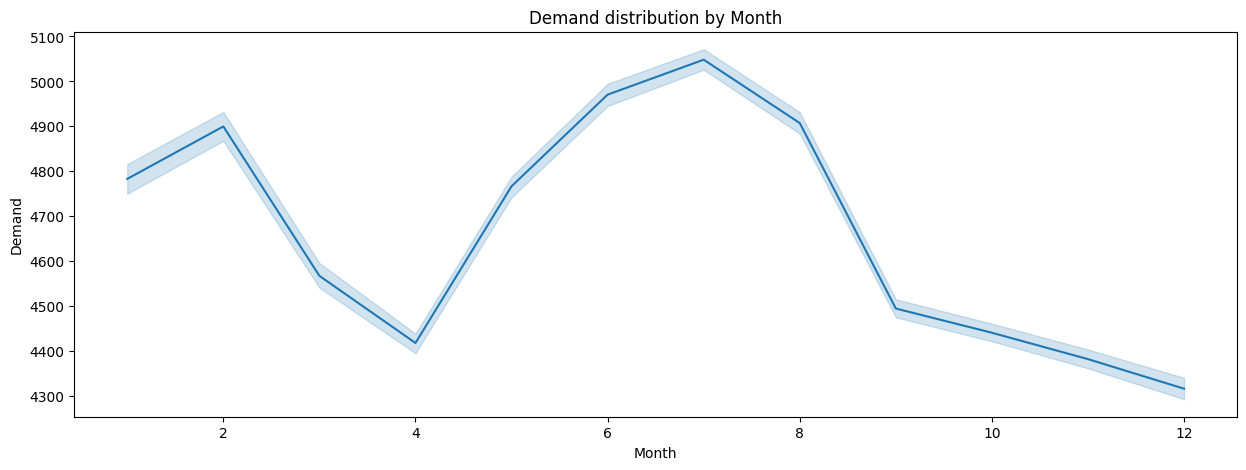

In [17]:
fig = plt.subplots(figsize=(15, 5))
sns.lineplot (x=df.Month, y=df.Demand, data=df).set_title('Demand distribution by Month')

Text(0.5, 1.0, 'Demand distribution by Day of the Month')

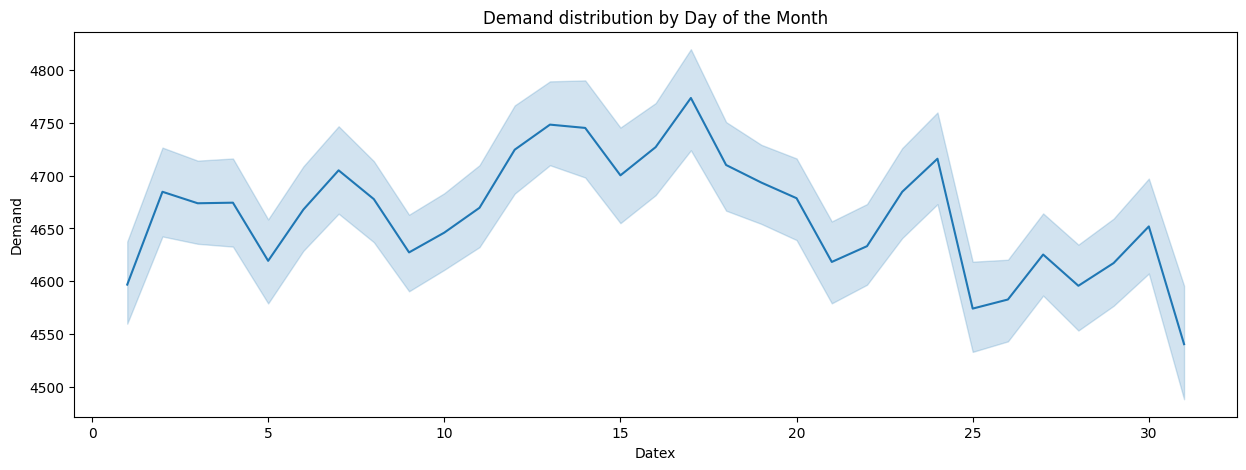

In [18]:
fig = plt.subplots(figsize=(15, 5))
sns.lineplot (x=df.Datex, y=df.Demand, data=df).set_title('Demand distribution by Day of the Month')

Text(0.5, 1.0, 'Demand distribution by Holiday')

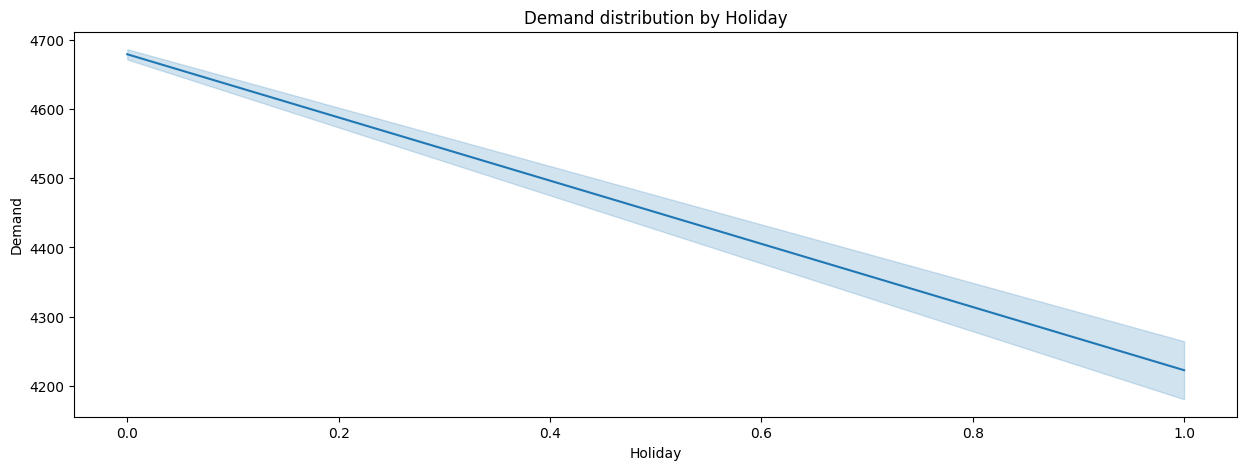

In [19]:
fig = plt.subplots(figsize=(15, 5))
sns.lineplot (x=df.Holiday, y=df.Demand, data=df).set_title('Demand distribution by Holiday')

Text(0.5, 1.0, 'Demand distribution by Hour')

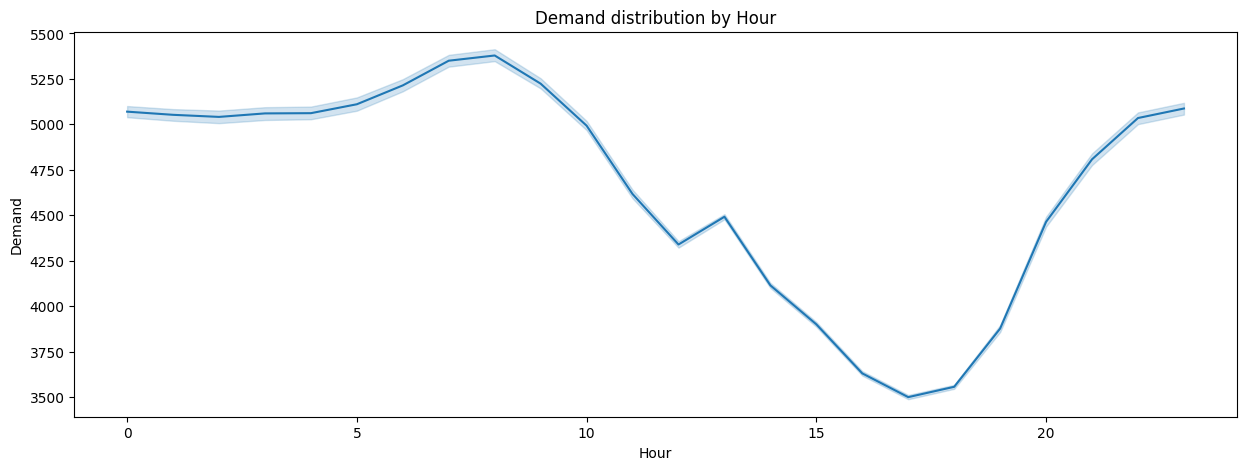

In [20]:
fig = plt.subplots(figsize=(15, 5))
sns.lineplot (x=df.Hour, y=df.Demand, data=df).set_title('Demand distribution by Hour')

# --------------------------------------------------------------------

# 3. Modelling

<h3> Demand vs Date Plot

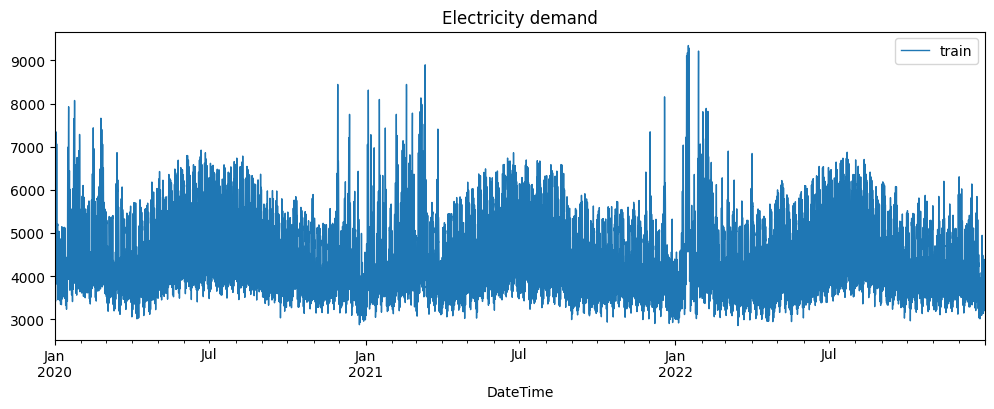

In [21]:
fig, ax = plt.subplots(figsize=(12, 4))
df.Demand.plot(ax=ax, label='train', linewidth=1)
ax.set_title('Electricity demand')
ax.legend()

<h3> Correlation

In [22]:
df.corr().head(1)

,Demand,Temperature,Holiday,Year,Month,Datex,Hour
Demand,1.0,0.259924,-0.086467,-0.05804,-0.134004,-0.017334,-0.359928


<Axes: >

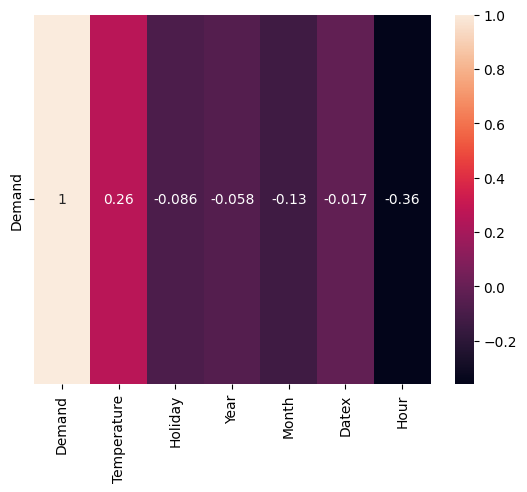

In [23]:
sns.heatmap(df.corr().head(1),annot=True)

Demand vs Tempratue

<module 'seaborn' from 'c:\\Program Files\\Python311\\Lib\\site-packages\\seaborn\\__init__.py'>

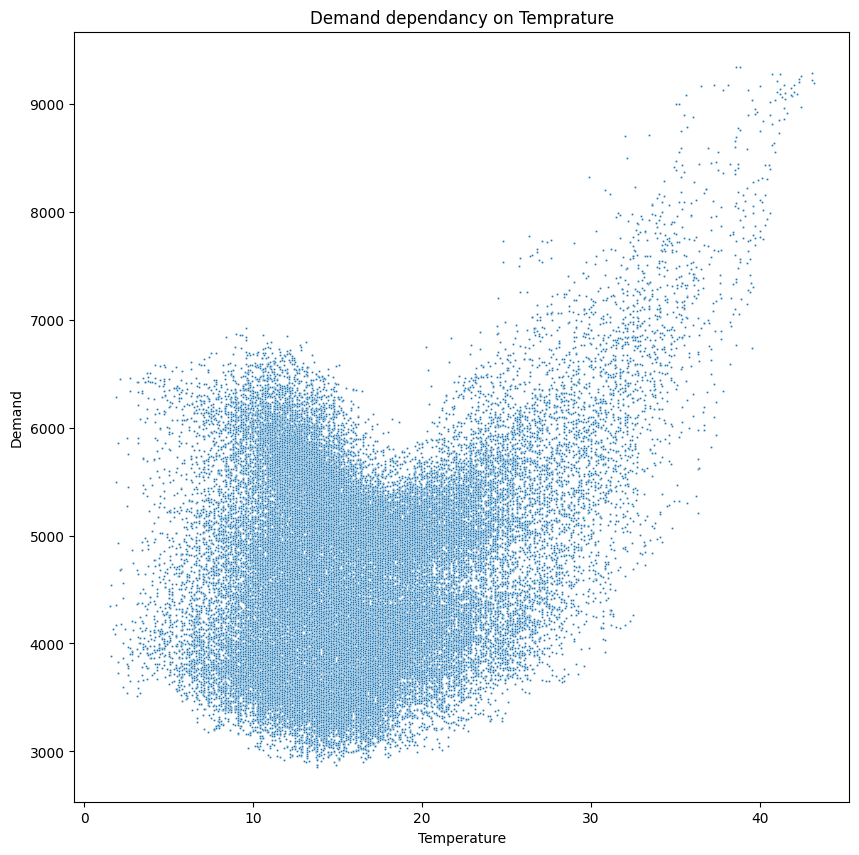

In [24]:
fig = plt.subplots(figsize=(10, 10))
sns.scatterplot (x=df.Temperature, y=df.Demand, data=df,marker=".",s=10).set_title('Demand dependancy on Temprature')
sns

Demand vs Month

<module 'seaborn' from 'c:\\Program Files\\Python311\\Lib\\site-packages\\seaborn\\__init__.py'>

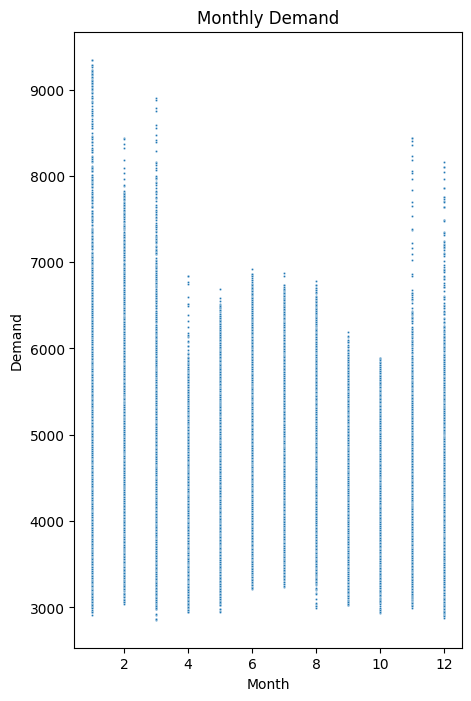

In [25]:
fig = plt.subplots(figsize=(5, 8))
sns.scatterplot (x=df.Month, y=df.Demand, data=df,marker=".",s=10).set_title('Monthly Demand')
sns

Demand vs Year

<module 'seaborn' from 'c:\\Program Files\\Python311\\Lib\\site-packages\\seaborn\\__init__.py'>

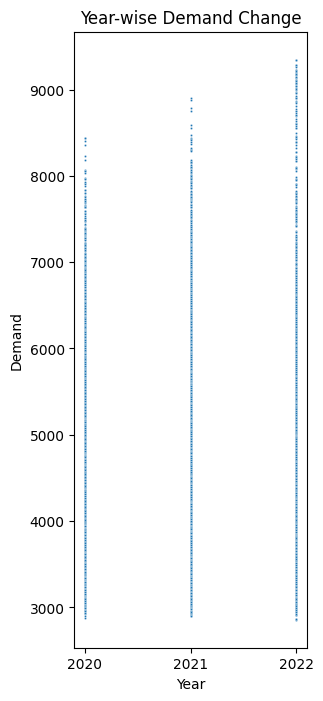

In [26]:
fig = plt.subplots(figsize=(3, 8))
sns.scatterplot (x=df.Year, y=df.Demand, data=df,marker=".",s=10).set_title('Year-wise Demand Change')
plt.xticks(locs[1:10:4])
sns

Demand vs Date

<module 'seaborn' from 'c:\\Program Files\\Python311\\Lib\\site-packages\\seaborn\\__init__.py'>

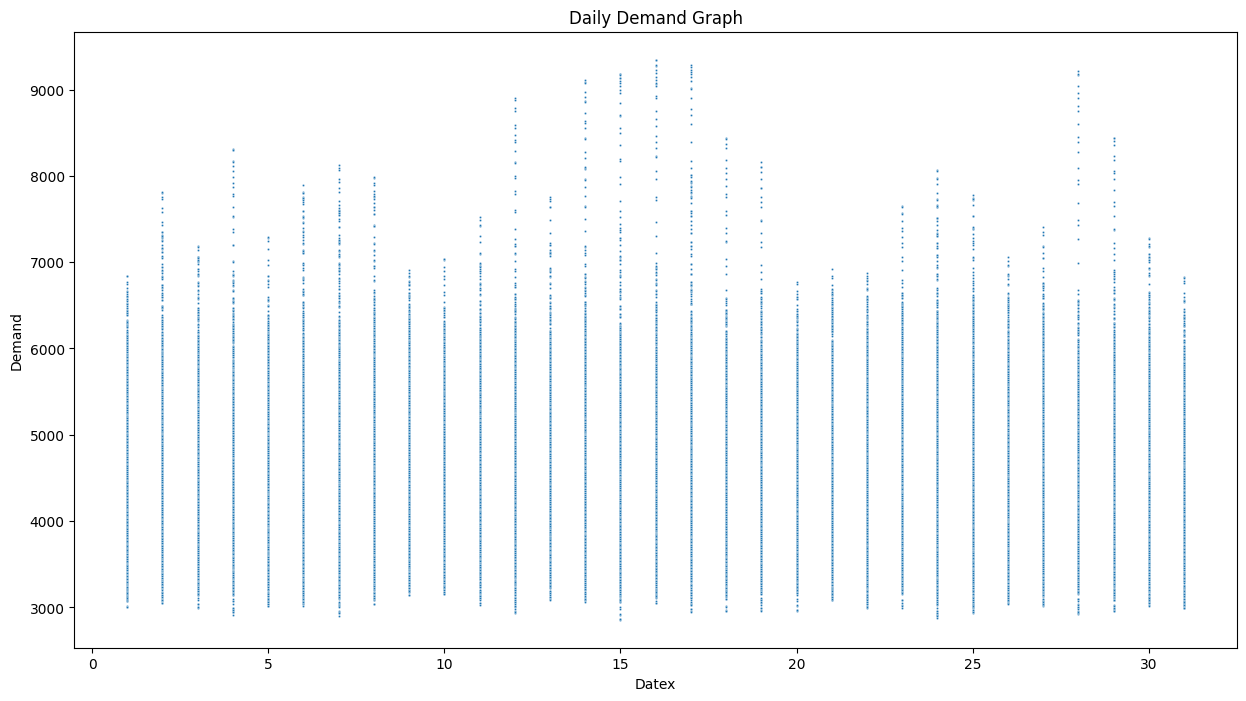

In [27]:
fig = plt.subplots(figsize=(15, 8))
sns.scatterplot (x=df.Datex, y=df.Demand, data=df,marker=".",s=10).set_title('Daily Demand Graph')
sns

Demand vs Hour

<module 'seaborn' from 'c:\\Program Files\\Python311\\Lib\\site-packages\\seaborn\\__init__.py'>

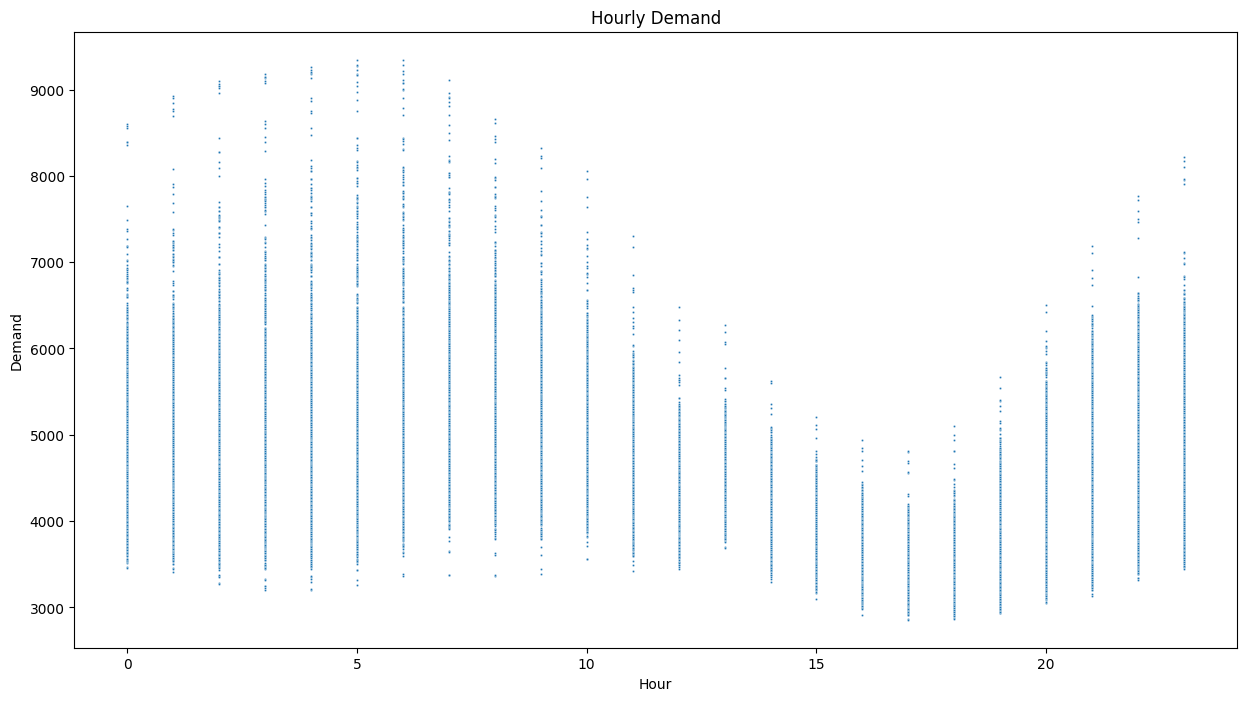

In [28]:
fig = plt.subplots(figsize=(15, 8))
sns.scatterplot (x=df.Hour, y=df.Demand, data=df,marker=".",s=10).set_title('Hourly Demand')
sns


<h2> Seperation data for training and verification

In [29]:
val = '2022-01-01 00:00:00'
test = '2022-12-01 00:00:00'
df_train = df.loc[: val, :]
df_validation   = df.loc[val:test, :]
df_test  = df.loc[test:, :]

print(f"Train dates      : {df_train.index.min()} --- {df_train.index.max()}")
print(f"Validation dates : {df_validation.index.min()} --- {df_validation.index.max()}")
print(f"Test dates       : {df_test.index.min()} --- {df_test.index.max()}")

Train dates      : 2020-01-01 00:00:00 --- 2022-01-01 00:00:00
Validation dates : 2022-01-01 00:00:00 --- 2022-12-01 00:00:00
Test dates       : 2022-12-01 00:00:00 --- 2022-12-31 12:30:00


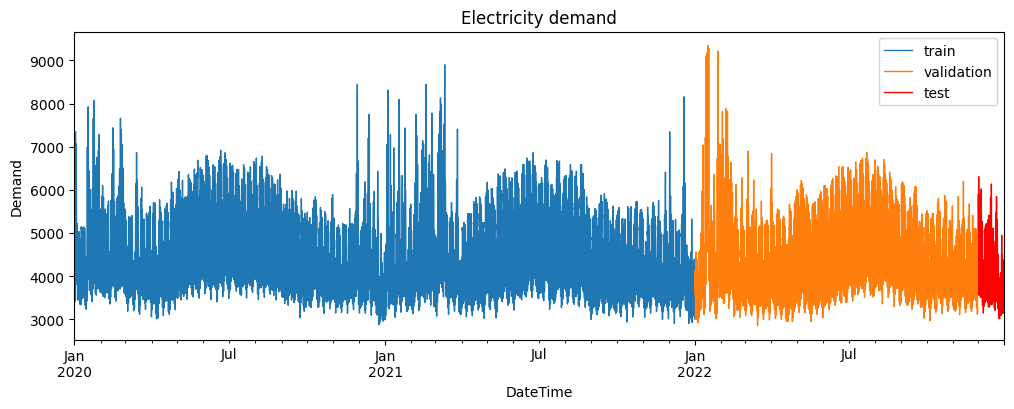

In [30]:
fig, ax = plt.subplots(figsize=(12, 4))
df_train.Demand.plot(ax=ax, label='train', linewidth=1)
df_validation.Demand.plot(ax=ax, label='validation', linewidth=1)
df_test.Demand.plot(ax=ax, label='test', linewidth=1, c='r')
ax.set_title('Electricity demand')
ax.set_ylabel("Demand")

ax.legend()

In [31]:
data = pd.read_csv('21bce183.171.172.PSC.InnovativeAssignment.csv')
data['Time'] = pd.to_datetime(data.DateTime, format='%Y-%m-%dT%H:%M:%SZ')
data = data.set_index('Time')
data = data.asfreq('30min')
data = data.sort_index()
d_valid = '2021-12-31 23:59:00'
d_test = '2022-11-30 23:59:00'
data_train = data.loc[: d_valid, :]
data_val   = data.loc[d_valid:d_test, :]
data_test  = data.loc[d_test:, :]

In [32]:
forecaster = ForecasterAutoreg(
                 regressor     = Ridge(random_state=123),
                 lags          = 24,
                 transformer_y = StandardScaler()
             )

forecaster.fit(y=data.loc[:d_valid, 'Demand'])
forecaster

ForecasterAutoreg 
Regressor: Ridge(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Transformer for y: StandardScaler() 
Transformer for exog: None 
Window size: 24 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2020-01-01 00:00:00'), Timestamp('2021-12-31 23:30:00')] 
Training index type: DatetimeIndex 
Training index frequency: 30T 
Regressor parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': 123, 'solver': 'auto', 'tol': 0.0001} 
Creation date: 2023-04-28 13:03:30 
Last fit date: 2023-04-28 13:03:30 
Skforecast version: 0.7.0 
Python version: 3.11.1 
Forecaster id: None 

In [33]:
metric, predictions = backtesting_forecaster(
                          forecaster         = forecaster,
                          y                  = data.Demand,
                          initial_train_size = len(data.loc[:d_test]),
                          fixed_train_size   = False,
                          steps              = 24,
                          metric             = 'mean_absolute_error',
                          refit              = False,
                          verbose            = True
                      )

Information of backtesting process
----------------------------------
Number of observations used for initial training: 51120
Number of observations used for backtesting: 1466
    Number of folds: 62
    Number of steps per fold: 24
    Last fold only includes 2 observations.

Data partition in fold: 0
    Training:   2020-01-01 00:00:00 -- 2022-11-30 23:30:00  (n=51120)
    Validation: 2022-12-01 00:00:00 -- 2022-12-01 11:30:00  (n=24)
Data partition in fold: 1
    Training:   2020-01-01 00:00:00 -- 2022-11-30 23:30:00  (n=51120)
    Validation: 2022-12-01 12:00:00 -- 2022-12-01 23:30:00  (n=24)
Data partition in fold: 2
    Training:   2020-01-01 00:00:00 -- 2022-11-30 23:30:00  (n=51120)
    Validation: 2022-12-02 00:00:00 -- 2022-12-02 11:30:00  (n=24)
Data partition in fold: 3
    Training:   2020-01-01 00:00:00 -- 2022-11-30 23:30:00  (n=51120)
    Validation: 2022-12-02 12:00:00 -- 2022-12-02 23:30:00  (n=24)
Data partition in fold: 4
    Training:   2020-01-01 00:00:00 -- 2022-

# Prediction Plot

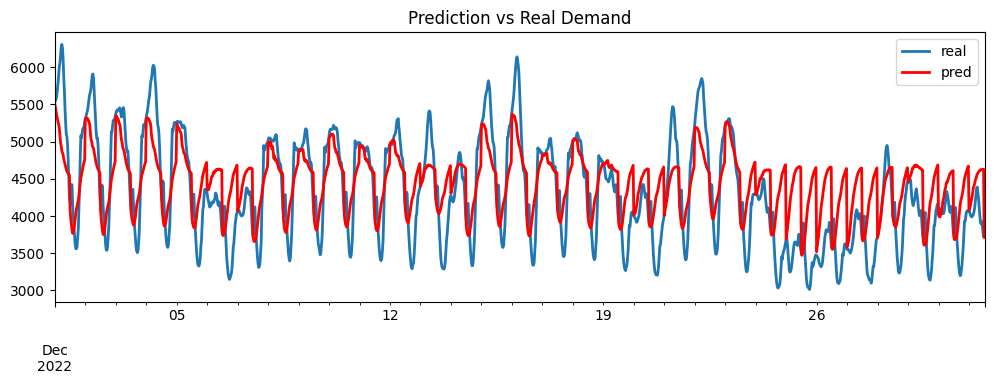

In [35]:
fig, ax = plt.subplots(figsize=(12, 3.5))
data.loc[predictions.index, 'Demand'].plot(ax=ax, linewidth=2, label='real')
predictions.plot(linewidth=2, label='prediction', ax=ax,c='r')
ax.set_title('Prediction vs Real Demand')
ax.legend();